In [20]:
from matplotlib import pyplot as plt
import pandas as pd
import scipy
import seaborn as sns
sns.set()

In [21]:
df = pd.read_csv("61506052 Test Data.txt", sep="\t")
df = df[df["Time[sec]"]>=0]
df

,Time[sec],Test_Cell_Temp[C],Test_Cell_RH[%],Phase_#,Dyno_Speed[mph],Dyno_Tractive_Effort[N],Accelerator_Pedal_Position[%],HV_Battery_Current[A],HV_Battery_Voltage[V],HV_Battery_SOC[%]
100,-0.000,34.539,41.509,0.0,0.0,-11.219,0.0,1.191,394.089,95.0
101,0.100,34.540,41.509,0.0,0.0,-11.165,0.0,1.183,394.089,95.0
102,0.200,34.539,41.509,0.0,0.0,-11.200,0.0,1.174,394.084,95.0
103,0.300,34.538,41.511,0.0,0.0,-11.219,0.0,1.158,394.088,95.0
104,0.400,34.538,41.514,0.0,0.0,-11.326,0.0,1.150,394.101,95.0
...,...,...,...,...,...,...,...,...,...,...
48396,4829.595,33.841,40.289,0.0,0.0,-10.950,0.0,-0.316,9.028,65.0
48397,4829.695,33.841,40.289,0.0,0.0,-11.236,0.0,-0.316,8.997,65.0
48398,4829.795,33.839,40.287,0.0,0.0,-11.291,0.0,-0.313,8.916,65.0
48399,4829.895,33.838,40.283,0.0,0.0,-11.227,0.0,-0.304,8.850,65.0


In [22]:
time = df["Time[sec]"]
power = df["HV_Battery_Current[A]"] * df["HV_Battery_Voltage[V]"]
energy = scipy.integrate.cumulative_trapezoid(power, x=time, initial=0)

Text(0, 0.5, 'Energy Used [kWh]')

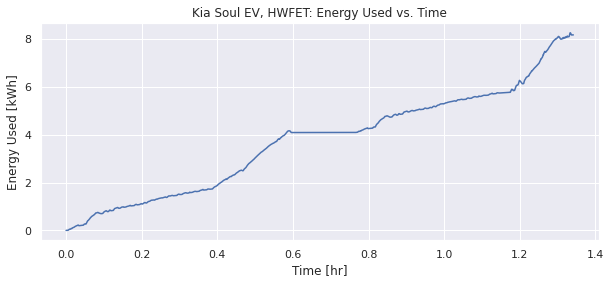

In [32]:
x = time / 3600
y = energy / 3.6e6

fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(111)

ax.plot(x, y)
ax.set_title("Kia Soul EV, HWFET: Energy Used vs. Time")
ax.set_xlabel("Time [hr]")
ax.set_ylabel("Energy Used [kWh]")